In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

In [47]:
def distances(data):
    dist_mat = np.matrix(np.zeros((data.shape[0],data.shape[0])))
    for i in range(data.shape[0]):
         a = data - data.loc[i]
         dist_mat[i,:] = np.linalg.norm(a, axis=1)
    return dist_mat

In [48]:
def greedyk(data, k):
    dist_mat = distances(data)
    centroid = data.sample()
    while (centroid.shape[0] < k):
        next_cen_loc = np.argmax(np.min(dist_mat[:,centroid.index],axis = 1))        
        centroid = centroid.append(data.loc[next_cen_loc])
    C = np.argmin(dist_mat[:,centroid.index],axis = 1)
    price = np.max(np.min(dist_mat[:,centroid.index],axis = 1))
    return centroid, C, price

In [49]:
def swapping(data, centroid, price, tau, dist_mat):
    rem_data = data.drop(labels=centroid.index)
    c = price
    new_cen = centroid.copy()
    for i in range(centroid.shape[0]):
        #print("#"*80)
        j_ = 5000
        new_cen = new_cen.drop(labels=centroid.index[i])
        
        for j in rem_data.index:
            new_cen = new_cen.append(rem_data.loc[j])
            new_price = np.sum(np.min(dist_mat[:,new_cen.index],axis = 1))
            if (new_price < (1-tau)*c):
                c = new_price
                j_ = j
                #print(j_)

            new_cen = new_cen.drop(labels=j)
        #print("*"*80)
        print(j_)

        if (j_ != 5000):
            new_cen = new_cen.append(rem_data.loc[j_])
            rem_data = rem_data.drop(labels=j_)
            #print(new_cen.shape)
        elif (j_ == 5000):
            new_cen = new_cen.append(centroid.loc[centroid.index[i]])
            #print(new_cen.shape)


    return new_cen

In [50]:
data = pd.read_csv(f"clustering.csv", header = None)
Q, C, price = greedyk(data, 2)
dist_mat = distances(data)
cost = np.sum(np.min(dist_mat[:,Q.index],axis = 1))

In [51]:
Q

,0,1
1602,6.3455,1.3337
642,-3.6773,-3.5965


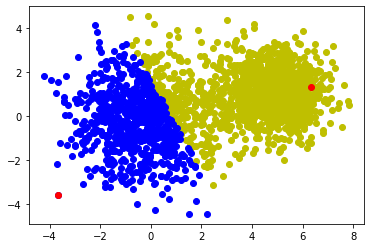

In [52]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C[i] == m):
            id.append(i)
    plt.scatter(data.loc[id][0],data.loc[id][1], c = color[m])
plt.scatter(Q.loc[:][0],Q.loc[:][1], c = 'r')

In [53]:
cost

6590.232202685413

In [54]:
new_cen = swapping(data,Q,cost,0.05,dist_mat)

1013
6


In [55]:
new_cen

,0,1
1013,3.882800,1.07680
6,0.010661,0.20867


In [56]:
price

7.845884656939585

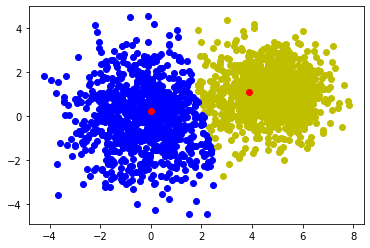

In [57]:
C = np.argmin(dist_mat[:,new_cen.index],axis = 1)
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C[i] == m):
            id.append(i)
    plt.scatter(data.loc[id][0],data.loc[id][1], c = color[m])
plt.scatter(new_cen.loc[:][0],new_cen.loc[:][1], c = 'r')

In [58]:
cost = np.sum(np.min(dist_mat[:,new_cen.index],axis = 1))

In [59]:
cost

3332.0467913021835

In [60]:
data1 =  pd.read_csv(f"Shape CSV.csv", header = None)
Q1, C1, price1 = greedyk(data1, 4)
dist_mat1 = distances(data1)
cost1 = np.sum(np.min(dist_mat1[:,Q.index],axis = 1))

In [61]:
Q1

,0,1
1043,-0.37755,-0.313080
2577,3.08110,6.756500
3078,7.16500,0.066071
643,0.71578,-6.051500


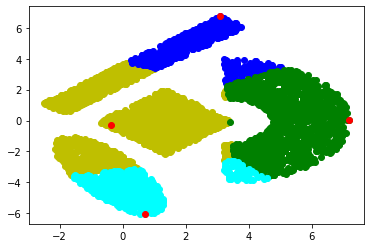

In [62]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C1)):
        if (C1[i] == m):
            id.append(i)
    plt.scatter(data1.loc[id][0],data1.loc[id][1], c = color[m])
plt.scatter(Q1.loc[:][0],Q1.loc[:][1], c = 'r')

In [63]:
cost1

19555.253131803824

In [64]:
new_cen1 = swapping(data1,Q1,cost1,0.05,dist_mat1)

5
11
6
13


In [65]:
new_cen1

,0,1
5,0.09688,-0.65587
11,3.25160,3.90680
6,5.01300,-1.94690
13,0.35551,-3.15250


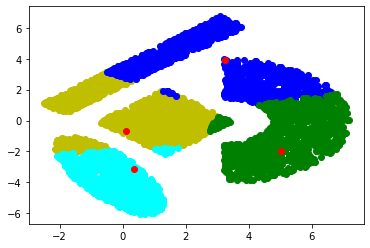

In [66]:
C1 = np.argmin(dist_mat1[:,new_cen1.index],axis = 1)
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C1)):
        if (C1[i] == m):
            id.append(i)
    plt.scatter(data1.loc[id][0],data1.loc[id][1], c = color[m])
plt.scatter(new_cen1.loc[:][0],new_cen1.loc[:][1], c = 'r')